# <div style="text-align: center">  Movie Industry Analysis  &nbsp; &nbsp;  // &nbsp; &nbsp; Análisis de la Industria Cinematográfica </div>

####     <div style="text-align: center">  Abril 2023 </div>

> > ####    <div style="text-align: center">  Alejandro Silvestre NOVOA GASTALDI   &nbsp; &nbsp;    //   &nbsp; &nbsp;    Portafolio: <a href="https://novoa.com.mx/proyectos/  " target="_blank">novoa.com.mx </a> </div>  

***

   <div class="alert alert-block alert-info" style="text-align: center">  <b>SKILLS</b>
    <br> Data Cleaning (Nulls, Dependent Data, Simplificacion de Columnas,  Data Validation, Expresiones Regulares, Data Types, Remove Duplicates)  
    <br> Data Analysis (Valores Atipicos con filtros Quantile e IQR, Transformacion de una Distribución No-Normal, Matriz de Correlación, Regression, Analisis de Variables Categoricas, Tabla de Contingencia, Grouped Filters, Graph Visualization)  
  </div>

***
 
#####   <div style="text-align: center"> <a href="https://www.kaggle.com/datasets/danielgrijalvas/movies" target="_blank">Fuente de Datos </a>  </div>



In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

from prettytable import PrettyTable


import math

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
%matplotlib inline 


In [2]:
# Read data

df = pd.read_csv('movies.csv')

In [3]:
pd.set_option('display.max_rows', None)    # turn on Scroll

In [4]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


***
  
***

#  <div style="text-align: center">  Data Exploration and Cleaning </div>

  <div class="alert alert-block alert-info">  <b></b> </div>

## Nulls

In [5]:
# there are missing data ?   // 

def missing_values() :
    
    NFilas = len(df['name']);
    print(  '# de Filas : {} \n'.format(NFilas)  )

    # Create a table with two columns  
    table = PrettyTable()
    table.field_names = ["Columna", "# Nulls", "% de Nulls"]


    # Iterate over the data and add rows to the table
    for col in df.columns :
        tempCol = df[col].isnull()
        count_missing = sum(tempCol)
        percent_missing = round(  100*np.mean( df[col].isnull() )  ,2)       # isnull() boolean  //  for mean: True = 1, False = 0
        if count_missing != 0 :
            table.add_row([col, count_missing, percent_missing])

        
    # Table properties
    table.align["Columna"] = "l"       # left align the genre column
    table.align["% de Nulls"] = "r"    # right align the score column
    table.padding_width = 1            # add some padding to the cells

    # Print the table
    print(table)
    
    
    
missing_values()

# de Filas : 7668 

+----------+---------+------------+
| Columna  | # Nulls | % de Nulls |
+----------+---------+------------+
| rating   |    77   |        1.0 |
| released |    2    |       0.03 |
| score    |    3    |       0.04 |
| votes    |    3    |       0.04 |
| writer   |    3    |       0.04 |
| star     |    1    |       0.01 |
| country  |    3    |       0.04 |
| budget   |   2171  |      28.31 |
| gross    |   189   |       2.46 |
| company  |    17   |       0.22 |
| runtime  |    4    |       0.05 |
+----------+---------+------------+


Podemos remover esas filas, pero los 2171 de 'budget' representan perder un 28.3% de los datos. Por lo que, se considerará remover esos datos sólo si se realiza un analisis que dependa de la variable 'budget'

***

### Duplicated - Dependent Data?
#### ¿Podemos llenar los Nulls con info dentro de la base de datos? 
#### Al revisar la data en busqueda de columnas dependientes - datos repetidos - 


> #### 'released'  podria relacionarse con 'year', 'country'.
> A detalle, el lugar y fecha de estreno no tiene que coincidir con el lugar y fecha de produccion. 
> Lo más adecuado es separar 'realesed' en diferentes columnas


##### Revisando las demas variables, estas se identifican como independientes

In [6]:
# Pero tiene muchos Nan inputs, es mejor eliminar

df[ df['released'].isnull() ]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


##### No eliminar indiscriminadamente, Siempre revisar los datos antes de eliminar

In [7]:
# Remove Nulls  //  Quitamos las filas que tengan más de 1 NaN

df = df.dropna(subset=['released']);
df = df.dropna(subset=['score']);        # Votes ya no tiene Nulls
df = df.dropna(subset=['writer']);      
df = df.dropna(subset=['star']);
df = df.dropna(subset=['country']);
df = df.dropna(subset=['runtime']);

# Quedan rating - 72, budget - 2164, gross - 181, company - 13  --- # de Filas : 7652 

df = df.dropna(axis=0, thresh= len(df.columns) -1 )  # Remove row // quedan filas con maximo 1 Null
 
    
missing_values()

# # de Filas : 7668  ->  7477 
print( '\n', 'Reducion de Datos en', ( 7668-len(df['name']) )/7668 , '% '  )

df[ df['company'].isnull() ]

# Se conservara por el momento estos NaNs. Dependiendo de su relevancia, a futuro serian omitidos o eliminados. 

# de Filas : 7477 

+---------+---------+------------+
| Columna | # Nulls | % de Nulls |
+---------+---------+------------+
| rating  |    11   |       0.15 |
| budget  |   1991  |      26.63 |
| gross   |    52   |        0.7 |
| company |    2    |       0.03 |
+---------+---------+------------+

 Reducion de Datos en 0.024908711528429838 % 


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
633,The Bear,PG,Biography,1984,"September 28, 1984 (United States)",6.1,270.0,Richard C. Sarafian,Michael Kane,Gary Busey,United States,221000.0,2687148.0,NaN,110.0
1572,Heart of Dixie,PG,Drama,1989,"August 25, 1989 (United States)",5.2,677.0,Martin Davidson,Anne Rivers Siddons,Ally Sheedy,United States,8000000.0,1097333.0,NaN,95.0


***

## New column

'release'  --->  'year_released'

Usamos split()

In [8]:
x = df['released'][1].split()     # Indentify split    

print(x[2])

1980


In [9]:
df['year_released'] = df['released'].str.split().str[2]

# errors? if 'released' was not standarized  //  si falto el dia o mes, modifica la ubicacion del año en el split

# data validation  //  drop_duplicates is like DISTINCT in SQL
df.drop_duplicates(subset = ['year_released']).sort_values(by= ['year_released'], ascending=True)['year_released'].values   

array(['(Australia)', '(United', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', 'States)', nan], dtype=object)

##### Data Validation :  there are errors  //  los ubicamos con regex

In [10]:
mask = pd.Series(df['year_released']).str.contains('[^0-9]' , na=False, regex=True).values ;  # dont sort: array withou index_row

print('# de errores: ', mask.sum(), '\n', 'con los distintos inputs:')

df[mask]['year_released'].sort_values(ascending=False).drop_duplicates()


# de errores:  46 
 con los distintos inputs:


6413        States)
1947        (United
5833    (Australia)
Name: year_released, dtype: object

##### identify nature of error 

In [11]:
df['released'][[6413,1947,5833]]

6413             2013 (United States)
1947    February 1992 (United States)
5833        November 2010 (Australia)
Name: released, dtype: object

##### //   2 tipos de errores: 
- sin dia ['(United', '(Australia)']    
- sin dia, ni mes ['States)']

In [12]:
# start with the unique nature mistake   //   sin dia, ni mes ['States)']

mask = pd.Series(df['year_released']).str.contains('States' , na=False, regex=True).values ;  # dont sort: array withou index_row

df.loc[mask,['year_released']] = df[mask]['released'].str.split().str[0];   # year: 0 position


# the other nature mistake   //   sin dia  ['(United', '(Australia)']
mask = pd.Series(df['year_released']).str.contains('[^0-9]' , na=False, regex=True).values ;  # dont sort: array withou index_row

df.loc[mask,['year_released']] = df[mask]['released'].str.split().str[1]; # year: 1 position


In [13]:
# Nulls ? 

df[ df['year_released'].isnull() ] [['released','year_released']]

,released,year_released
312,1982 (Japan),NaN
786,1985 (Taiwan),NaN
2816,1995 (Iran),NaN


##### //   hay NaN aunque se removieron los NaN de 'released' :
- la 3er cadena split().str[2] era el año para la mayoria de datos, pero si 'released' tiene menos de 3 cadenas genera un NaN

In [14]:
mask = df['year_released'].isnull() ;

df.loc[mask,['year_released']] = df[ mask ]['released'].str.split().str[0];   # year: 0 position

In [15]:
# finish 'year_released' validation:  only years inputs 

df.drop_duplicates(subset = ['year_released']).sort_values(by= ['year_released'], ascending=True)['year_released'].values

array(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'], dtype=object)

***

## Data types 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7477 entries, 0 to 7659
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7477 non-null   object 
 1   rating         7466 non-null   object 
 2   genre          7477 non-null   object 
 3   year           7477 non-null   int64  
 4   released       7477 non-null   object 
 5   score          7477 non-null   float64
 6   votes          7477 non-null   float64
 7   director       7477 non-null   object 
 8   writer         7477 non-null   object 
 9   star           7477 non-null   object 
 10  country        7477 non-null   object 
 11  budget         5486 non-null   float64
 12  gross          7425 non-null   float64
 13  company        7475 non-null   object 
 14  runtime        7477 non-null   float64
 15  year_released  7477 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory usage: 1.2+ MB


##### ¿Considerar omitir ceros, convertir float to int?


- gross, budget   son cantidades de millones // done
- votes no son divisibles // done


- ¿runtime, sus decimales son relevantes? Habrá que revisar...

In [17]:
count = 0 ;

for element in df['runtime'] :
    if math.isnan(element) == False :
        count = count + element % math.ceil(element)      # ceiling // techo 

print(count, " inputs de runtime tienen decimales distintos de cero ")

0.0  inputs de runtime tienen decimales distintos de cero 


In [18]:
# convert float -> int

df['year_released'] = df['year_released'].astype('Int64')

df['budget'] = df['budget'].astype('Int64')        # 'int64' no admite NaN,  pero 'Int64' si 
df['gross'] = df['gross'].astype('Int64')          # 'Int64' es formato nuevo, se identifico errores con seaborn 

df['votes'] = df['votes'].astype('Int64')


df['runtime'] = df['runtime'].astype('Int64')


df.head(1)   # Se comprueba 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980


***

## Remove Duplicates

In [19]:
# df['name'] = df['name'].drop_duplicates()      # si fuese necesario, pero no se identificaron duplicados en esta base de datos

df[['director']].drop_duplicates().sort_values(by='director', ascending=True).head(5)        # lista de directores sin repetir

,director
5394,A.R. Murugadoss
5134,Aamir Khan
4308,Aaron Blaise
1383,Aaron Norris
4988,Aaron Seltzer


***

## Standarize Inputs

In [20]:
#serch with parcial coincidence  // busqueda con coincidencia parcial 

mask = pd.Series(df['company']).str.contains('isney' , na=False, regex=True).values ;  # dont sort: array withou index_row

df[mask]['company'].drop_duplicates()

# df['company'].mask(mask, 'Walt Disney', inplace=True)    # estandariza todas las filiales de Disney a un input
# df['company'] = df['company'].mask(mask, 'Walt Disney')    # estandariza omitiendo 'inplace=True'

40            Walt Disney Productions
117     Walt Disney Animation Studios
403              Walt Disney Pictures
1751      Disney Television Animation
6636               Disneytoon Studios
Name: company, dtype: object

 Disney studios  //  
En principio el tener una compañia con diferentes nombres puede parecer un error, 
 pero denota las diferentes filiales de Disney, tal que los distintos nombres corresponden a diferentes (sub)compañias, 
 que dependiendo del criterio, se deberian o no de estandarizar en un valor unico 

***

***





#  <div style="text-align: center">  Data Analysis </div>

  <div class="alert alert-block alert-info">  <b></b> </div>

##  Outliers //  Valores Atipicos

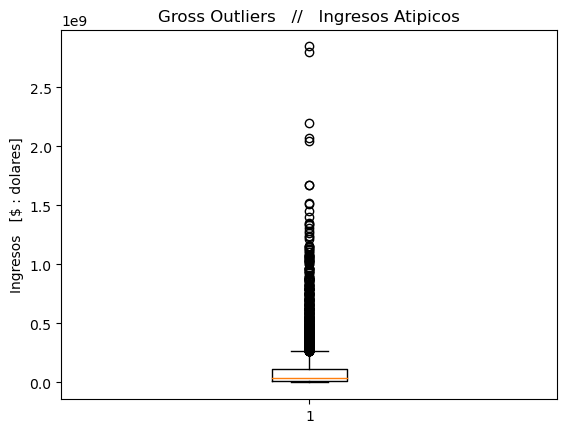

Medians: [36711988.0]
Means:   []
Minimums: [309]
Maximums: [263920180]


In [21]:
x= df.dropna(subset=['budget', 'gross'])['gross'];

bp = plt.boxplot(x)

plt.title('Gross Outliers   //   Ingresos Atipicos')         
plt.ylabel('Ingresos   [$ : dolares]')

plt.show()


# boxplot data  // mediana
medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
means = [round(item.get_ydata()[0], 1) for item in bp['means']]
print(f'Medians: {medians}\n'
      f'Means:   {means}')


# // maximo y minimo del boxplot
minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
print(f'Minimums: {minimums}\n'
      f'Maximums: {maximums}')

In [22]:
# Count Ouliers

Num_Peliculas = df['name'].count() ;

print('# de datos/peliculas:', Num_Peliculas )

print('# de valores atipicos de gross:', df[df['gross']>263920180].count()['gross'] )

print('% de Outliers:', round( df[df['gross']>263920180].count()['gross']*100 / Num_Peliculas  ,2) , '%' )


# de datos/peliculas: 7477
# de valores atipicos de gross: 555
% de Outliers: 7.42 %


C:\Users\sil_1\AppData\Local\Temp\ipykernel_12268\1759935171.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, color = 'blue')


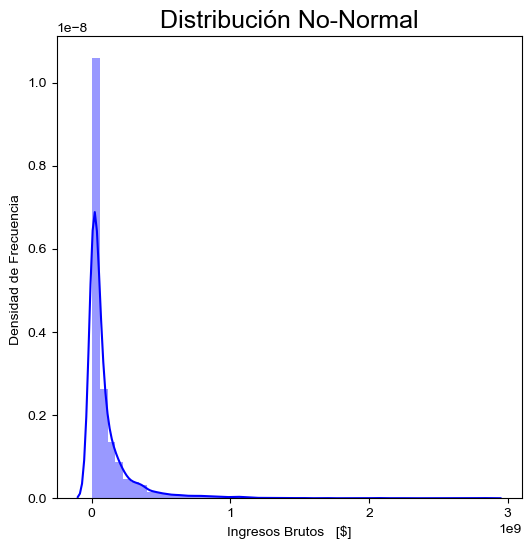

In [23]:
# // El gran porcentaje de potenciales outliers hace revizar la distribucion de la data:

# Density Plot and Histogram 

plt.figure(figsize = (6, 6))

data = df.dropna(subset=['budget', 'gross'])['gross'];

sns.distplot(data, color = 'blue')
sns.set(context = 'talk', style = 'darkgrid')

plt.xlabel('Ingresos Brutos   [$]')
plt.ylabel('Densidad de Frecuencia ')

plt.title("Distribución No-Normal")

plt.show()

#### No es posible aplicar los criterios estendarizados para outliners porque no tenemos una distribucion normal, por lo que usamos la transformación boxcox para normalizar los datos

## BoxCox Transformation for a Non-Normal Distribution

C:\Users\sil_1\AppData\Local\Temp\ipykernel_12268\2989042337.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_bc[0], color='blue')


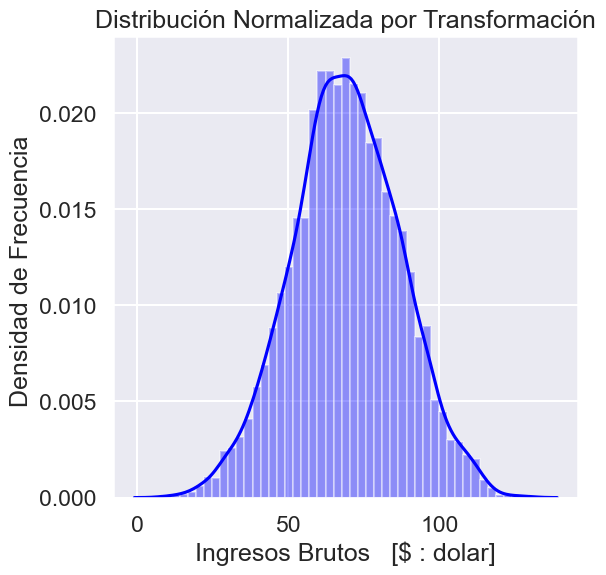

In [24]:
# data transformation

from scipy import stats

data_bc = stats.boxcox(data.astype(float))

plt.figure(figsize = (6, 6))

sns.distplot(data_bc[0], color='blue')
sns.set(context = 'talk', style = 'darkgrid')

plt.xlabel('Ingresos Brutos   [$ : dolar]')
plt.ylabel('Densidad de Frecuencia ')

plt.title("Distribución Normalizada por Transformación")

plt.show()



#### A continuacion, se muestran dos metodos para filtrar outliners. 
#####    Quantile filter  //  Solo considera el procentaje dentro del orden de los datos (x mayor que y), pero no considera distancias : El criterio es indepentiente de la Transformacion. Pero solo es un criterio para distribuciones normales.

###   IQR   //  Considera la distancia entre quantiles: depende de la transformacion. 

In [25]:
# Quantile filter method // criteria: descartar el 1% mayor y el 1% menor


# Data Original
print(' Quantile filter // Data Original')
lim99_bc = np.quantile( data, 0.99);      # 1% mayor
outlier99 = np.count_nonzero(lim99_bc < data)
print('limite superior:', lim99_bc, '     Cantidad de datos filtrados', outlier99)

lim99_bc = np.quantile( data, 0.01);     # 1% menor
outlier99 = np.count_nonzero(lim99_bc > data)
print('limite inferior:', lim99_bc, '     Cantidad de datos filtrados', outlier99)


# Data transformada
print('\n Quantile filter // Data Normalizada (Transformada BoxCox)')
lim99_bc = np.quantile( data_bc[0], 0.99);
outlier99 = np.count_nonzero(lim99_bc < data_bc[0])
print('limite superior:', lim99_bc, '     Cantidad de datos filtrados', outlier99)

lim01_bc = np.quantile( data_bc[0], 0.01);
outlier01 = np.count_nonzero(lim01_bc > data_bc[0])
print('limite inferior:', lim01_bc, '     Cantidad de datos filtrados', outlier01)

print('\n El criterio Quantile solo depende del orden de los datos, no de la distancia entre estos. Por eso es independiente de la transformacion')



 Quantile filter // Data Original
limite superior: 945738604.3300004      Cantidad de datos filtrados 55
limite inferior: 109416.09      Cantidad de datos filtrados 55

 Quantile filter // Data Normalizada (Transformada BoxCox)
limite superior: 110.71938222759165      Cantidad de datos filtrados 55
limite inferior: 27.760395288381584      Cantidad de datos filtrados 55

 El criterio Quantile solo depende del orden de los datos, no de la distancia entre estos. Por eso es independiente de la transformacion


 IQR filter // Data Original
Distancia entre 1er y 3er quantile: 101309599.0      Cantidad de datos filtrados 555

 IQR filter // Data Normalizada (Transformada BoxCox)
Distancia entre 1er y 3er quantile: 23.942169583889253      Cantidad de datos filtrados gross_bc    12
dtype: int64

 
 
 Taquilla maxima 
  --- Data Original 2847246203 
 --- Despues del filtro IQR-boxcox: gross_bc    1.670728e+09
dtype: float64

 
 
 Taquilla minima 
  --- Data Original 309 
 --- Despues del filtro IQR-boxcox: gross_bc    8315.0
dtype: float64


C:\Users\sil_1\AppData\Local\Temp\ipykernel_12268\4033150144.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_filtrada, color = 'blue')


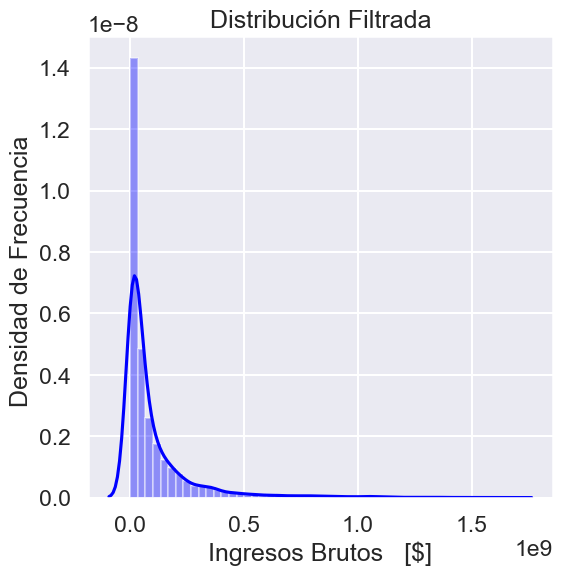

In [26]:
# IQR filter Method

# Data Original
print(' IQR filter // Data Original')
iqr = np.quantile( data, 0.75) - np.quantile( data, 0.25)
lim = np.abs((data - data.median()) / iqr) < 2.22            # criteria: 2.22 IQR (equiv. to z-score < 3) 
print('Distancia entre 1er y 3er quantile:', iqr, '     Cantidad de datos filtrados', data.count() - lim.sum())



# Data transformada
print('\n IQR filter // Data Normalizada (Transformada BoxCox)')
df_data_bc = pd.DataFrame(data_bc[0], columns = ['gross_bc'])

iqr = np.quantile( data_bc[0], 0.75) - np.quantile( data_bc[0], 0.25)
mask_lim = np.abs((df_data_bc - df_data_bc.median()) / iqr) < 2.22      # criteria: 2.22 IQR
print('Distancia entre 1er y 3er quantile:', iqr, '     Cantidad de datos filtrados', data.count() - mask_lim.sum())

data_filtrada_bc = df_data_bc[mask_lim]    # Datos sin outliers se usa el methodo mask sobre los datos transformados




# Se hace la transformacion inversa sobre los datos filtrados
from scipy import special

data_filtrada = special.inv_boxcox(data_filtrada_bc, data_bc[1])    # lamda = databoxcox[1]


print('\n \n \n Taquilla maxima \n  --- Data Original', data.max(), '\n --- Despues del filtro IQR-boxcox:', data_filtrada.max())

print('\n \n \n Taquilla minima \n  --- Data Original', data.min(), '\n --- Despues del filtro IQR-boxcox:', data_filtrada.min())

plt.figure(figsize = (6, 6))

sns.distplot(data_filtrada, color = 'blue')
sns.set(context = 'talk' , style = 'darkgrid')

plt.xlabel('Ingresos Brutos   [$]')
plt.ylabel('Densidad de Frecuencia ')

plt.title("Distribución Filtrada")

plt.show()


#### Identificamos los valores atipicos

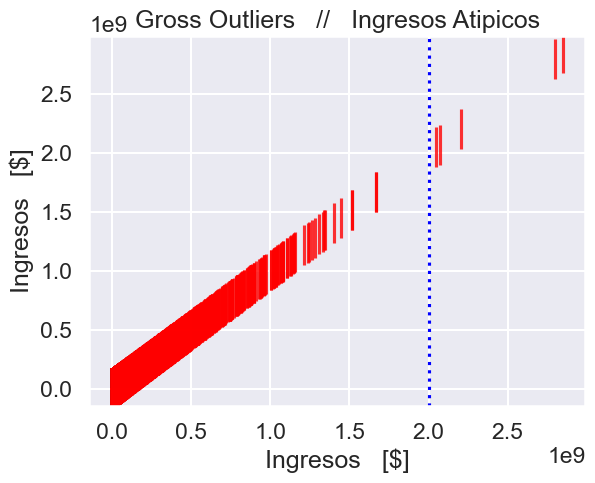

In [27]:
# Criteria: 2E+9, mayor al maximo del filtro IQR/boxcox 

x= df.dropna(subset=['budget', 'gross'])['gross']

plt.scatter( x ,   x , 
            marker='|', s=800, c='red', alpha=0.8)
plt.axvline(x = 2E+9, linestyle = 'dotted', color = 'blue')

sns.set(context = 'talk', style='ticks')

plt.title('Gross Outliers   //   Ingresos Atipicos'  )       
plt.xlabel('Ingresos   [$]' )
plt.ylabel('Ingresos   [$]')

plt.show()

##### Se revisa los posibles outliers:
#####  Ingresos arriba de 2 mil millones de dolares

In [28]:
df.loc[df['gross'] > 2E+9].sort_values(by='gross', ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


***

### New Column

###  // Ganancias respecto a presupuesto (de producción)

In [29]:
df['reveneue_per_budget'] = df['gross'] - df['budget'];

df.head(1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,reveneue_per_budget
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,27998772


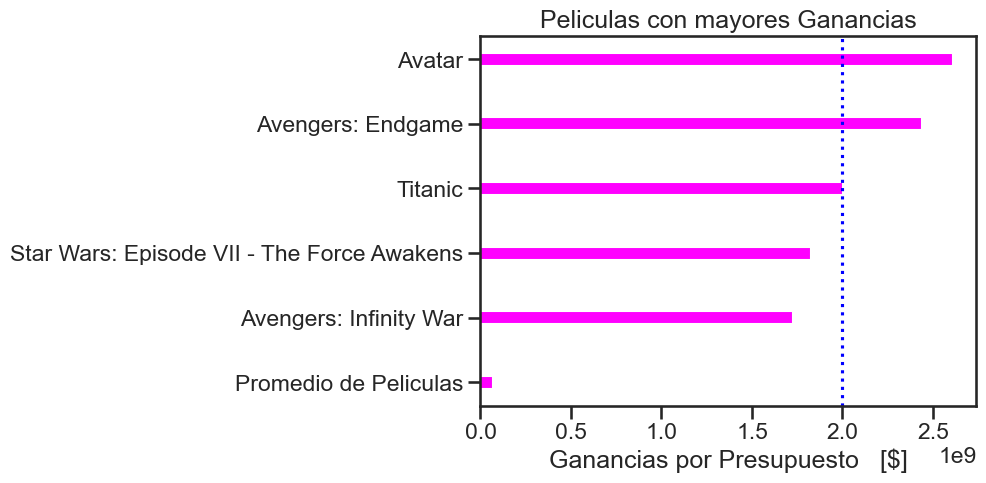

In [30]:
x = ['Promedio de Peliculas'] ;
x = np.append(x,  df.loc[df['gross'] > 2E+9].sort_values(by='gross', ascending=True)['name'].values  ) ;

y = [df['reveneue_per_budget'].mean()] ;
y = np.append(y,  df.loc[df['gross'] > 2E+9].sort_values(by='gross', ascending=True)['reveneue_per_budget'].values  ) ;


plt.barh(x,y, height=0.2, color = 'magenta')

plt.axvline(x = 2E+9, linestyle = 'dotted', color = 'blue')
sns.set(context = 'talk', style='ticks')

plt.title('Peliculas con mayores Ganancias')     
plt.xlabel('Ganancias por Presupuesto   [$]') #labeling the x axis


plt.show()


  
***

# Analisis de Correlacion

  <div class="alert alert-block alert-info">  <b></b> </div>

## Variables Numericas

In [31]:
correlation_matrix = df.corr(method='pearson')   # Methods: pearson, kendall, spearman

correlation_matrix

,year,score,votes,budget,gross,runtime,year_released,reveneue_per_budget
year,1.000000,0.098124,0.220993,0.331629,0.258936,0.115460,0.997516,0.237664
score,0.098124,1.000000,0.414415,0.075918,0.187819,0.400132,0.105640,0.242839
votes,0.220993,0.414415,1.000000,0.442106,0.631150,0.310226,0.216662,0.609283
budget,0.331629,0.075918,0.442106,1.000000,0.740393,0.320064,0.324181,0.610662
gross,0.258936,0.187819,0.631150,0.740393,1.000000,0.245001,0.251962,0.984419
runtime,0.115460,0.400132,0.310226,0.320064,0.245001,1.000000,0.115190,0.241268
year_released,0.997516,0.105640,0.216662,0.324181,0.251962,0.115190,1.000000,0.232986
reveneue_per_budget,0.237664,0.242839,0.609283,0.610662,0.984419,0.241268,0.232986,1.000000


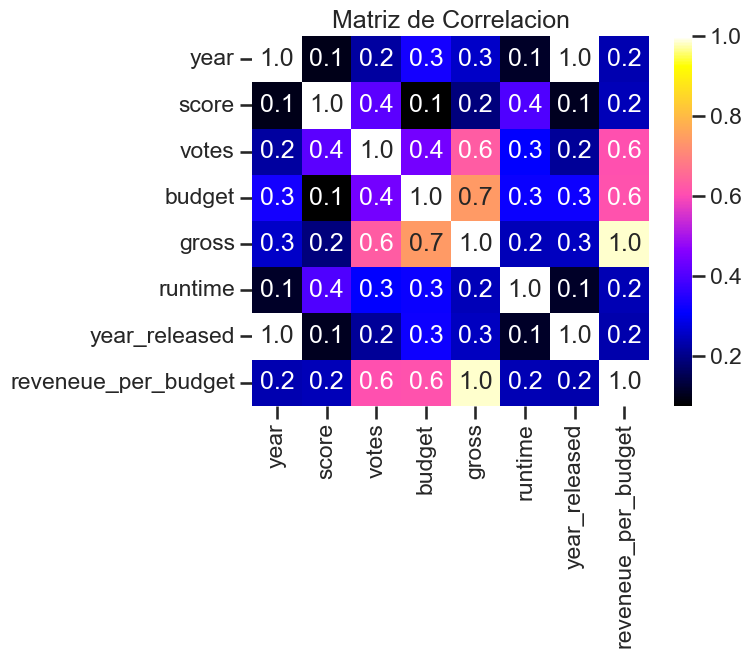

In [32]:
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="gnuplot2")

plt.title('Matriz de Correlacion')

sns.set(context = 'talk')
          

plt.show()


Ignoramos la correlacion year/year_released y la de gross/reveneue_per_budget pues se contruyeron como columnas dependientes.

### Identificamos las correlaciones mas altas:
### *  0.74 de gross / budget
### *  0.61 gross / votes



***

### Presupuesto vs Ingresos

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(close=None, block=None)>

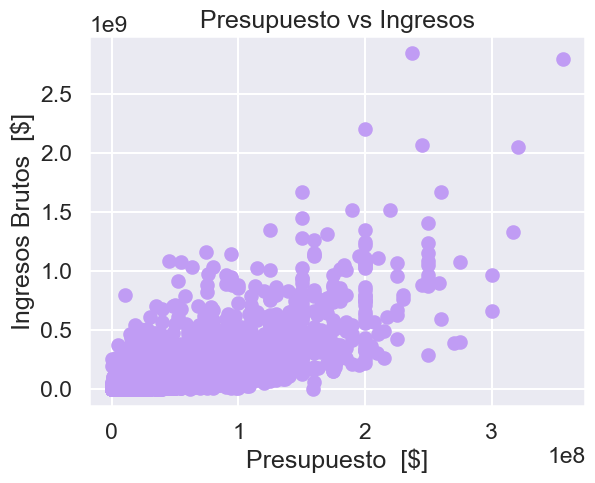

In [33]:
# Scatter plot :  budget vs gross
x= df.dropna(subset=['budget', 'gross'])['budget'];
y= df.dropna(subset=['budget', 'gross'])['gross']


plt.scatter( x ,   y , c= [0.75206157, 0.61371875, 0.95615786] )

plt.title('Presupuesto vs Ingresos')
plt.xlabel('Presupuesto  [$]')
plt.ylabel('Ingresos Brutos  [$]')

plt.show

In [34]:
# regplot de seaborn entra en conflicto con el formato reciente 'Int64'

df = df.dropna(subset=['budget', 'gross'])         #  Se quitan todos los NaN

df['budget'] = df['budget'].astype('int64')        # 'int64' no admite NaN,  pero 'Int64' si 
df['gross'] = df['gross'].astype('int64')

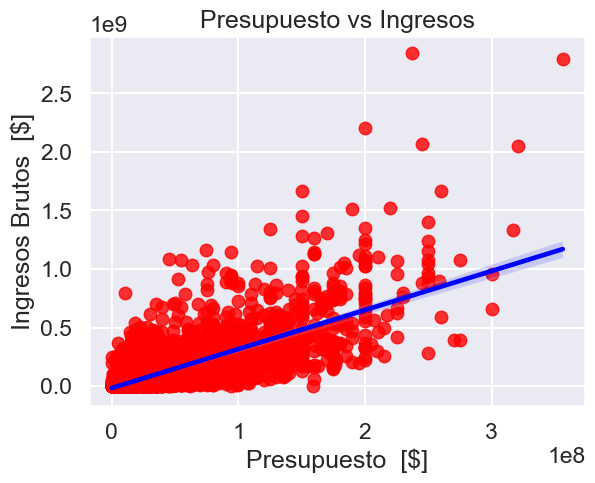

In [35]:
# using seaborn


plt.title('Budget vs Gross // Presupuesto vs Ingresos Brutos')
sns.regplot( x = 'budget', y='gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'} )

sns.set(context = 'talk', style='darkgrid')

plt.title('Presupuesto vs Ingresos')
plt.xlabel('Presupuesto  [$]')
plt.ylabel('Ingresos Brutos  [$]')

plt.show()

***

### Votos vs Ingresos

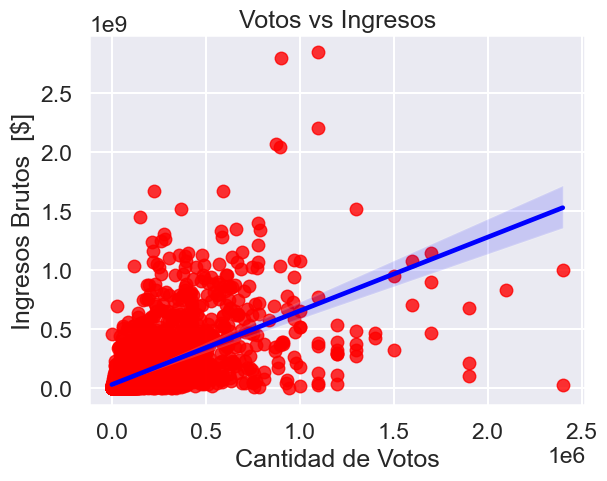

In [36]:
# using seaborn

# regplot de seaborn entra en conflicto con el formato reciente 'Int64'
df = df.dropna(subset=['votes', 'gross'])         #  Se quitan todos los NaN
df['votes'] = df['votes'].astype('int64')        # 'int64' no admite NaN,  pero 'Int64' si 


sns.regplot( x = 'votes', y='gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'} )

sns.set(context = 'talk', style='darkgrid')

plt.title('Votos vs Ingresos')
plt.xlabel('Cantidad de Votos')
plt.ylabel('Ingresos Brutos  [$]')

plt.show()

  
***

# Analisis de Correlacion

  <div class="alert alert-block alert-info">  <b></b> </div>

## Variables Categoricas

Hay que tener cuidado con no perderse al hacer una Codificacion (Numerizacion) de los datos categoricos

En Variables Ordinales, puede tener sentido al cuantificar el orden. Pero, para Variables Nominales. El analisis relevante debe de ser la moda. El Codificar puede ser util si se busca analizar y estandarizar distancias entre conjuntos

In [37]:
df.head(1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,reveneue_per_budget
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,27998772


#### Variables Categoricas

V. Nominales: name, genre, released, director, writer, star, country, company

V. Ordinales: rating

Con solo una variable ordinal, no conviene codificar. Por lo que se optara por:

## Cross Tabulation \\ Tabla de Contingencia

In [38]:
# genre vs rating

Cat1 = df['genre']
Cat2 = df['rating']

Cross_GenreRating = pd.crosstab(Cat1, Cat2, rownames=['Genre'])

Cross_GenreRating

rating,Approved,G,NC-17,Not Rated,PG,PG-13,R,TV-MA,Unrated,X
Genre,,,,,,,,,,
Action,0,0,0,5,146,586,677,1,0,0
Adventure,1,13,0,0,166,76,71,0,0,0
Animation,0,82,0,1,175,13,6,0,0,0
Biography,0,1,0,2,47,109,152,0,1,0
Comedy,0,11,2,6,275,552,642,0,8,0
Crime,0,0,3,4,5,38,345,0,4,0
Drama,0,3,6,20,78,292,460,1,4,0
Family,0,1,0,0,3,0,0,0,0,0
Fantasy,0,0,0,2,3,8,28,0,0,0


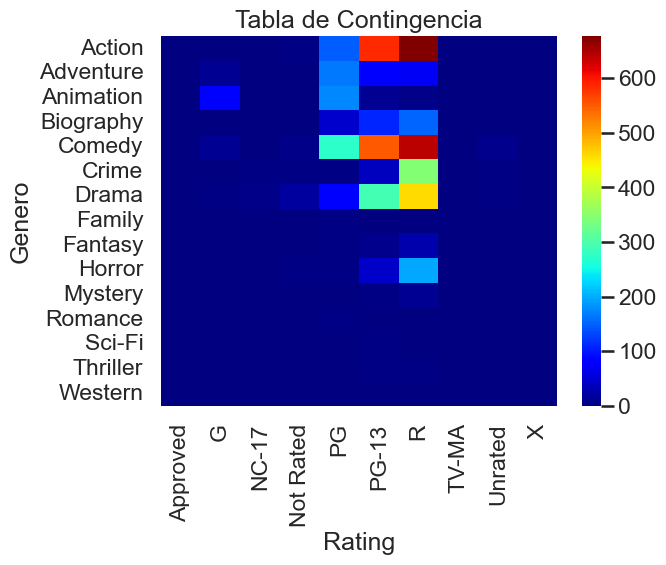

In [39]:
sns.heatmap(Cross_GenreRating,  cmap="jet")
sns.set(context = 'talk')

plt.title('Tabla de Contingencia')
plt.xlabel('Rating')
plt.ylabel('Genero')

plt.show()

In [40]:
# // Filtramos los datos para los Generos relevantes


Cat1 = df.loc[(df['genre'] == 'Action') | (df['genre'] == 'Comedy') | (df['genre'] == 'Crime') | (df['genre'] == 'Drama')] ['genre']
Cat2 = df['rating']

Cross_GenreRating = pd.crosstab(Cat1, Cat2)

Cross_GenreRating = Cross_GenreRating[['PG', 'PG-13','R']]

Cross_GenreRating 

rating,PG,PG-13,R
genre,,,
Action,146,586,677
Comedy,275,552,642
Crime,5,38,345
Drama,78,292,460


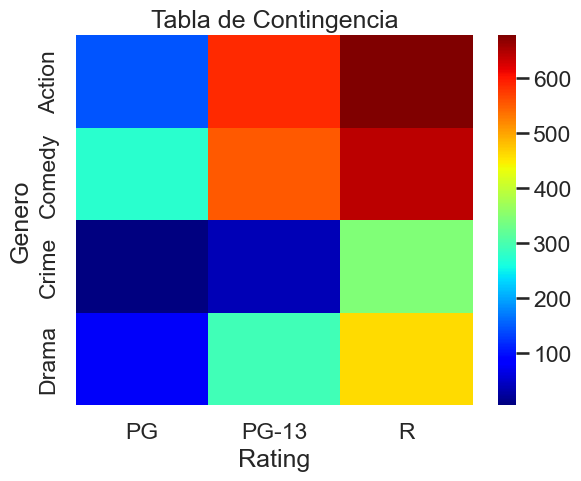

In [41]:
sns.heatmap(Cross_GenreRating, cmap="jet")
sns.set(context = 'talk')

plt.title('Tabla de Contingencia')
plt.xlabel('Rating')
plt.ylabel('Genero')

plt.show()

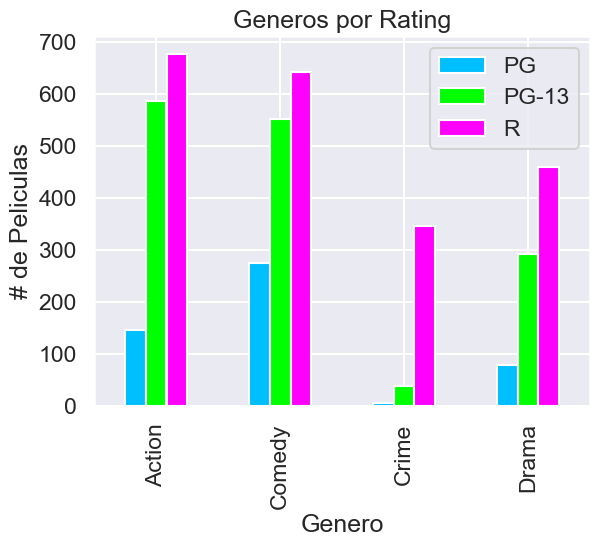

In [42]:
Cross_GenreRating.plot.bar( color={"PG": "deepskyblue" , 'PG-13':'lime',  "R": "magenta"} )
sns.set(context = 'talk')

plt.title('Generos por Rating')
plt.xlabel('Genero')
plt.ylabel('# de Peliculas')

plt.legend(loc='upper right');

plt.show()

##### // Genre vs Rating eran las variables más apropiadas para realizar una tabla cruzada completa. Las demás variables tienen una gran cantidad de categorias, lo cual entorpece el analisis. Es mejor analizar sólo los parametros de mayor frecuencia para esas variables.

***

##### // Por ejemplo, si nos preguntasemos ¿Cuál es el actor estrella que más ha trabajado con la compañia que más producciones tiene?

### Star of the largest production Company

In [43]:
# // Primero, identificamos la moda de company: La compañia con más peliculas

print('Compañia            ', '# de Peliculas')
df['company'].value_counts().sort_values(ascending=False).head(5)

Compañia             # de Peliculas


Universal Pictures       330
Columbia Pictures        302
Warner Bros.             299
Paramount Pictures       279
Twentieth Century Fox    209
Name: company, dtype: int64

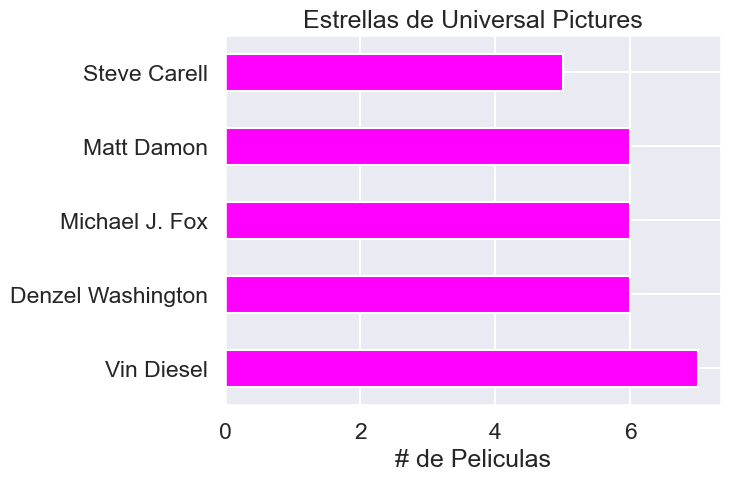

In [44]:
Cat1 = df.loc[(df['company'] == 'Universal Pictures')]['company'] 
Cat2 = df['star']

crosstab_StarCompanyFiltered = pd.crosstab(Cat1, Cat2).max().sort_values(ascending=False).head(5)


crosstab_StarCompanyFiltered.plot.barh(  color = 'magenta')

sns.set(context = 'talk')

plt.title('Estrellas de Universal Pictures')
plt.xlabel('# de Peliculas')
plt.ylabel('')

plt.show()

In [45]:
# // Vin Diesel es la estrella de la mayor productora, a pesar de que la moda de star sea Nicolas Cage

df['star'].value_counts().sort_values(ascending=False).head(5)

Nicolas Cage      40
Tom Hanks         38
Robert De Niro    38
Tom Cruise        34
Bruce Willis      34
Name: star, dtype: int64

  
***

# Variables Numericas vs Categoricas

  <div class="alert alert-block alert-info">  <b></b> </div>

### // Analisemos el Genero por su popularidad

In [46]:
# Genre vs Votes   //   Normalizo cantidad de votos por pelicula de cada Genero

Norm_min = df[['genre','votes']].groupby(['genre']).mean().min()

Norm_max = df[['genre','votes']].groupby(['genre']).mean().max()


df_VotesGenreNorm = ((    df[['genre','votes']].groupby(['genre']).mean().sort_values(by=['votes'], ascending=True) - Norm_min    ) / ( Norm_max - Norm_min ))

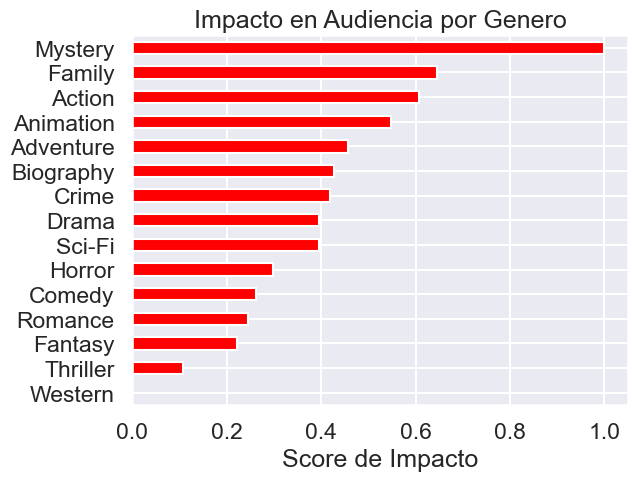

In [47]:
# Find most popular genre by vote

ax = df_VotesGenreNorm\
.plot(kind='barh', title = 'Impacto en Audiencia por Genero', color = 'red')

sns.set(context = 'talk')

ax.set_ylabel('')
ax.set_xlabel('Score de Impacto')
plt.legend().remove()

plt.show()

#### Impact Score Scale:  [0,1]

#### Impact Score does not represent a rating of the opinion of a movie. It represents its impact on the public, so that more people vote for each film that comes out in that genre. 

#### //  Impact Score no representa una calificacion de la opinion de una pelicula. Representa el impacto o interes en el publico, de tal manera que más personas efectuan su voto por cada pelicula que sale de ese genero. 

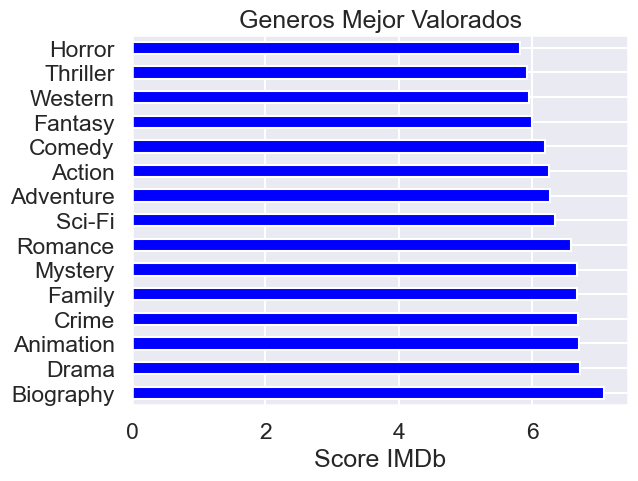

In [48]:
# Genre vs Score   //   Normalizo cantidad de votos por pelicula de cada Genero

ax = df[['genre','score']].groupby(['genre']).mean().sort_values(by=['score'], ascending=False) \
.plot(kind='barh', title = 'Generos Mejor Valorados', color = 'blue')


sns.set(context = 'talk')

ax.set_ylabel('') 
ax.set_xlabel('Score IMDb')
plt.legend().remove()

plt.show()

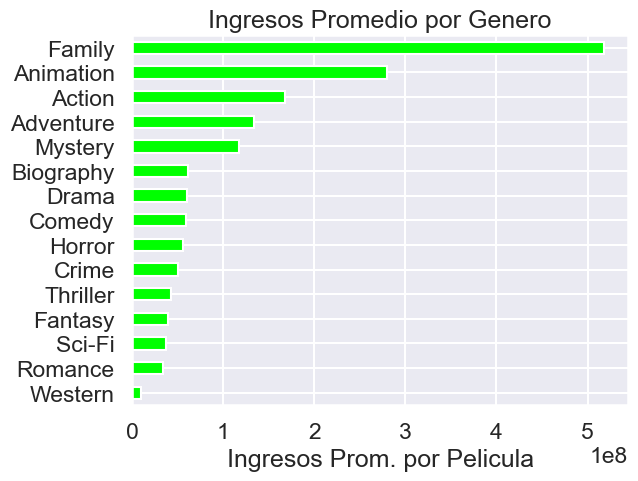

In [49]:
ax = df[['genre','gross']].groupby(['genre']).mean().sort_values(by=['gross'], ascending=True)\
.plot(kind='barh', title = 'Ingresos Promedio por Genero', color = 'lime')

sns.set(context = 'talk')

ax.set_ylabel('') 
ax.set_xlabel('Ingresos Prom. por Pelicula')
plt.legend().remove()

plt.show()

***

### Estrella, escritor y director mejor rankeados

#### Star vs director vs writer

In [50]:
# 

df[['star', 'director', 'writer', 'score']].groupby(['star', 'director', 'writer']).mean().sort_values(by=['score'], ascending=False).head(5)

,,,score
star,director,writer,
Tim Robbins,Frank Darabont,Stephen King,9.3
John Travolta,Quentin Tarantino,Quentin Tarantino,8.9
Liam Neeson,Steven Spielberg,Thomas Keneally,8.9
Leonardo DiCaprio,Christopher Nolan,Christopher Nolan,8.8
Brad Pitt,David Fincher,Chuck Palahniuk,8.8


In [51]:
df[['star', 'director', 'gross']].groupby(['star', 'director']).mean().sort_values(by=['gross'], ascending=False).head(5)

,,gross
star,director,
Sam Worthington,James Cameron,2.847246e+09
Robert Downey Jr.,Anthony Russo,2.422931e+09
Leonardo DiCaprio,James Cameron,2.201647e+09
Donald Glover,Jon Favreau,1.670728e+09
Chris Pratt,Colin Trevorrow,1.670516e+09


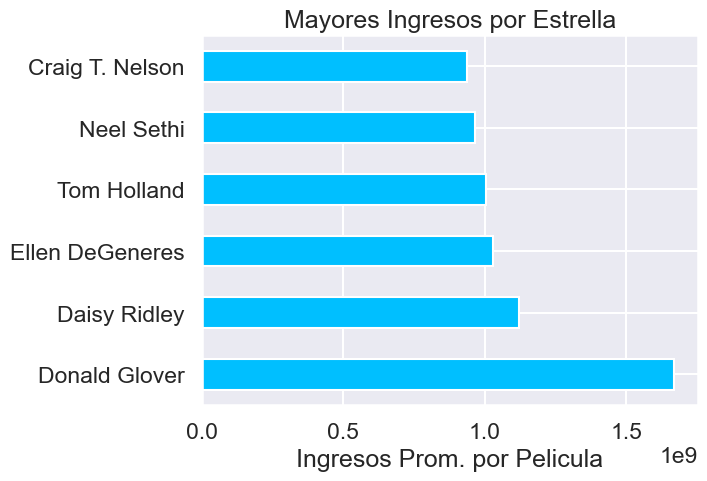

In [52]:
ax = df[['star','gross']].groupby('star').mean().sort_values(by=['gross'], ascending=False).head(6)\
.plot(kind='barh', title='Mayores Ingresos por Estrella', color = 'deepskyblue')

sns.set(context = 'talk')

ax.set_xlabel('Ingresos Prom. por Pelicula')
ax.set_ylabel('')
plt.legend().remove()

plt.show()



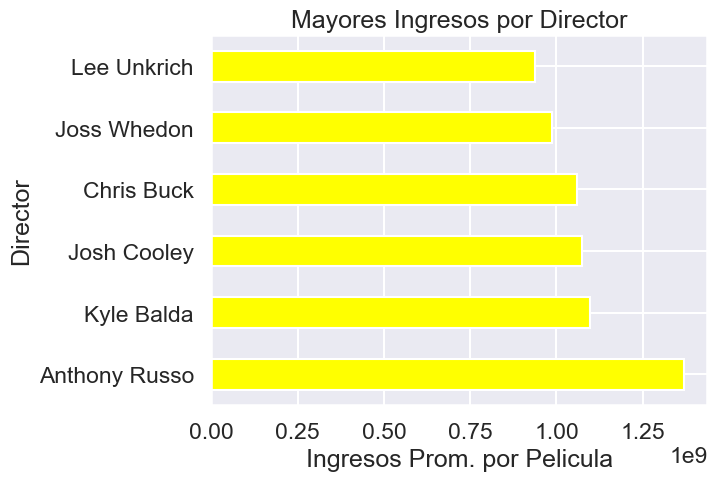

In [53]:
ax = df[['director','gross']].groupby('director')\
.mean().sort_values(by=['gross'], ascending=False).head(6).plot(kind='barh', title='Mayores Ingresos por Director', color = 'yellow')

sns.set(context = 'talk')

plt.legend().remove()
ax.set_xlabel('Ingresos Prom. por Pelicula')
ax.set_ylabel('Director')

plt.show()

***

### Top Companies by Gross 

#### // Compañias con mayores ingresos brutos acumulados

In [54]:
# lifetime  // Mayores Ingresos totales

CompanyGrossSum = df.groupby('company')[["gross"]].sum().sort_values('gross', ascending = False)[:5]

CompanyGrossSum

,gross
company,
Warner Bros.,54773202654
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303


#### // Compañias con mayores ingresos brutos anuales

In [55]:
# by year  // Mayores Ingresos anuales

df.groupby(['company', 'year'])[["gross"]].sum().sort_values(by=['gross'], ascending=False).head(5)

,,gross
company,year,
Walt Disney Pictures,2019,5773131804
Marvel Studios,2018,4018631866
Universal Pictures,2015,3834354888
Twentieth Century Fox,2009,3793491246
Walt Disney Pictures,2017,3789382071


> > ####    <div style="text-align: center">  Portafolio: <a href="https://novoa.com.mx/proyectos/  " target="_blank">novoa.com.mx </a> </div>  

***

   <div class="alert alert-block alert-info" style="text-align: center">  <b>SKILLS</b>
    <br> Data Cleaning (Nulls, Dependent Data, Simplificacion de Columnas,  Data Validation, Expresiones Regulares, Data Types, Remove Duplicates)  
    <br> Data Analysis (Valores Atipicos con filtro Quantile e IQR, Transformacion de una Distribución No-Normal, Correlation Matrix, Regression, Analisis de Variables Categoricas, Tabla de Contingencia, Grouped Filters, Graph Visualization)  
  </div>

***
 
#####   <div style="text-align: center"> <a href="https://www.kaggle.com/datasets/danielgrijalvas/movies" target="_blank">Fuente de Datos </a>  </div>


